In [1]:
import sklearn
import pandas as pd

In [92]:
data_good=pd.read_csv('D:\\emg_data\\20201103\\YCH\\featureData\\EMG19_31_33_good_1_nohead.txt',sep='\s+')
data_five=pd.read_csv('D:\\emg_data\\20201103\\YCH\\featureData\\EMG19_31_33_five_1_nohead.txt',sep='\s+')
data_one=pd.read_csv('D:\\emg_data\\20201103\\YCH\\featureData\\EMG19_31_33_one_1_nohead.txt',sep='\s+')
data_six=pd.read_csv('D:\\emg_data\\20201103\\YCH\\featureData\\EMG19_31_33_six_1_nohead.txt',sep='\s+')
data_ten=pd.read_csv('D:\\emg_data\\20201103\\YCH\\featureData\\EMG19_31_33_ten_1_nohead.txt',sep='\s+')
data_three=pd.read_csv('D:\\emg_data\\20201103\\YCH\\featureData\\EMG19_31_33_three_1_nohead.txt',sep='\s+')

In [93]:
data_three['label']=1
data_ten['label']=2
data_six['label']=3
data_one['label']=4
data_five['label']=5
data_good['label']=6

In [94]:
data_five.drop(['ZC1', 'ZC2', 'ZC3', 'ZC4',
       'ZC5', 'ZC6', 'ZC7', 'ZC8', 'ZC9', 'ZC10', 'ZC11', 'ZC12', 'ZC13',
       'ZC14', 'ZC15', 'ZC16'],axis=1,inplace=True)


In [95]:
data=pd.concat([data_three,data_ten,data_six,data_one,data_five,data_good])

In [96]:
#打乱顺序
from sklearn.utils import shuffle
data_raw = shuffle(data)
x=data_raw.iloc[:,:-1]
y=data_raw.iloc[:,-1]

In [97]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(x, y):
    strat_train_set = data_raw.iloc[train_index]
    strat_test_set = data_raw.iloc[test_index]   # 保证测试集

In [101]:
strat_train_x=strat_train_set.iloc[:,:-1]
strat_train_y=strat_train_set.iloc[:,-1]
strat_test_x=strat_test_set.iloc[:,:-1]
strat_test_y=strat_test_set.iloc[:,-1]

In [107]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf=clf.fit(strat_train_x,strat_train_y)
y_pred=clf.predict(strat_test_x)
clf.score(strat_test_x,strat_test_y)

0.9957264957264957

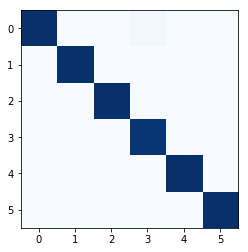

In [113]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_pred,strat_test_y)
import matplotlib.pyplot as plt
plt.imshow(cnf_matrix,interpolation='nearest',cmap=plt.cm.Blues)